In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.dirname('__file__')))
os.environ["R_HOME"] = r"C:\Program Files\R\R-4.4.2"
os.environ['R_LANGUAGE'] = 'en_US.UTF-8'

In [2]:
%%capture
import os
from controller.injector import Injector
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages
from rpy2.robjects import pandas2ri
import matplotlib.pyplot as plt
import json
if not rpackages.isinstalled('rugarch') or not rpackages.isinstalled('rmgarch'):
    raise RuntimeError('rugarch missing')

injector = Injector(conf_file=f'{os.getcwd()}{os.sep}config{os.sep}config.json')
injector.local_cache()

In [ ]:
#!pip install --upgrade yfinance pandas_datareader requests

In [3]:
#!pip install -q -r Requirements.txt

In [15]:
from model.names import IndexMeta as im
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from model.names import IndexMeta

def get_df_to_show(name, injector):
    for index in injector.indexes:
        if index.i_name == name:
            return index.df
    return {}

def plot_adj_close(name, injector):
    plt.figure(figsize=(12, 6))
    df = get_df_to_show(name, injector)
    plt.plot(df.index, df[im.ADJUSTED_CLOSE])
    plt.show()


sns.set_style("whitegrid")
def multi_plot_in_row(dfs: list[pd.DataFrame], info=IndexMeta.LOG_RETURN_PERCENTAGE,
                      fig_size=(20, 30), plot_names=None):
    if plot_names is None:
        plot_names = ["plot"]
    fig, axs = plt.subplots(len(dfs), 1, figsize=fig_size)
    i = 0
    for df in dfs:
        sns.lineplot(x=df.index, y=df[info], ax=axs[i], color='blue')
        axs[i].set_title(f'{plot_names[i%len(plot_names)]}')
        i+=1
    plt.show()

In [1]:
from IPython.core.display import HTML

# Definire il CSS come stringa
css = """
    <style>
    /* Corpo della pagina */
    body {
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        background-color: #f7f9fc;
        color: #2c3e50;
        margin: 0;
        padding: 0;
        line-height: 1.6;
    }

    /* Contenitore principale */
    .container {
        width: 80%;
        margin: 0 auto;
        padding: 40px;
    }

    /* Titoli */
    h1 {
        font-size: 40px;
        text-align: center;
        color: #2980b9;
        margin-bottom: 20px;
    }

    h2 {
        font-size: 30px;
        color: #2980b9;
        margin-top: 40px;
        border-bottom: 2px solid #2980b9;
        padding-bottom: 10px;
    }

    h3 {
        font-size: 24px;
        color: #34495e;
        margin-top: 20px;
    }

    /* Paragrafi */
    p {
        font-size: 18px;
        color: #34495e;
        margin-bottom: 20px;
    }

    /* Liste */
    ul {
        list-style-type: square;
        margin-left: 30px;
        margin-bottom: 20px;
    }

    li {
        font-size: 18px;
        color: #34495e;
    }

    /* Evidenziazione */
    .highlight {
        color: #e74c3c;
        font-weight: bold;
    }

    /* Sezioni */
    .section {
        margin-bottom: 40px;
    }

    .content {
        background-color: #ffffff;
        padding: 30px;
        border-radius: 8px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        margin-top: 20px;
    }

    /* Link */
    a {
        color: #2980b9;
        text-decoration: none;
        font-weight: bold;
    }

    a:hover {
        text-decoration: underline;
    }

    /* Footer */
    footer {
        text-align: center;
        padding: 20px;
        background-color: #2c3e50;
        color: white;
        font-size: 16px;
        margin-top: 40px;
    }
</style>


"""

# Visualizzare il CSS
HTML(css)


In [2]:
paragraph_1 = """<h1>Progetto di Metodi Probabilistici e Statistici per Mercati Finanziari</h1>
<h2>Autore: Dissan Uddin Ahmed</h2>

<div class="content">
    <h2>Analisi Finanziaria Dei Mercati Nazionali</h2>
    <p>I mercati finanziari nazionali rappresentano un pilastro fondamentale dell’economia globale, riflettendo le dinamiche economiche, politiche e sociali di ciascun paese. Questo tipo di analisi aiuta gli investitori a gestire il rischio e capire quali titoli inserire nel proprio portafoglio finanziario. Si cerca di capire come la volatilità sia un parametro da tenere d'occhio quando si investe in borsa.</p>

    <div class="section">
        <h3>1) Analisi di mercato</h3>
        <p>La liquidità di un mercato finanziario si riferisce alla facilità con cui gli investitori possono comprare o vendere titoli finanziari senza causare significative fluttuazioni nei prezzi di mercato. Un mercato altamente liquido è caratterizzato da una maggiore attività di scambio di titoli, un elevato numero di partecipanti, un elevato volume di scambi giornalieri e una stretta differenza tra i prezzi di acquisto (offerta) e i prezzi di vendita (domanda), noti come spread.</p>
        <p>La liquidità è un importante fattore da considerare quando si decide di investire in un mercato finanziario.</p>
    </div>

    <div class="section">
        <h3>1.1) Entrata e Uscita mercato azionario</h3>
        <p>L'entrata e l'uscita dal mercato finanziario sono processi fondamentali per investitori e aziende. Un investitore entra nel mercato acquistando strumenti finanziari come azioni, obbligazioni o derivati, generalmente tramite un intermediario finanziario come una banca o un broker. La decisione di investire si basa su analisi di mercato e strategie di rendimento.</p>
        <p>Le aziende possono entrare nel mercato attraverso la quotazione in borsa (IPO), e uscire quando decidono di vendere i propri asset o quando non rispettano i requisiti di mercato.</p>
    </div>

    <div class="section">
        <h3>1.2) Liquidità del Mercato Azionario</h3>
        <p>La liquidità del mercato azionario si riferisce alla facilità con cui le azioni possono essere acquistate o vendute senza causare fluttuazioni significative nel loro prezzo. Ci sono due aspetti principali della liquidità:</p>
        <ul>
            <li><b>Liquidità immediata:</b> La capacità di eseguire ordini di acquisto o vendita a un prezzo vicino al valore di mercato senza influenzare il prezzo stesso.</li>
            <li><b>Profondità del mercato:</b> La quantità di ordini di acquisto e vendita a vari livelli di prezzo.</li>
        </ul>
        <p>Fattori che influenzano la liquidità includono il volume di scambi, la volatilità e la partecipazione degli investitori istituzionali.</p>
    </div>

    <div class="section">
        <h2>2) Estrazione dei dati</h2>
        <p>Sono stati scelti i mercati nazionali più importanti e il mercato nazionale italiano, un mercato più piccolo, per verificare alla fine dello studio, se c'è correlazione tra queste borse. I dati sono stati scaricati tramite la libreria Python <code>yfinance</code>, e comprendono la serie storica degli ultimi due anni degli indici delle seguenti borse:</p>
        <ol>
            <li>FTSE MIB</li>
            <li>Dow Jones</li>
            <li>NASDAQ</li>
            <li>Nikkei 225</li>
            <li>HANG SENG INDEX</li>
        </ol>
    </div>
</div>
"""
HTML(paragraph_1)

## Dati dei Mercati
In questa sezione si osservano i dataset che sono stati presi in considerazione ed i prezzi di chiusura rettificata delle varie borse.
### FTSE MIB

In [7]:
get_df_to_show('FTSE MIB', injector)

,Adjusted Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-02-20,27597.0,27597.0,27852.0,27590.0,27843.0,553061800
2023-02-21,27409.0,27409.0,27575.0,27157.0,27524.0,542316600
2023-02-22,27102.0,27102.0,27389.0,26868.0,27362.0,672419600
2023-02-23,27278.0,27278.0,27449.0,27132.0,27181.0,560127200
2023-02-24,26986.0,26986.0,27413.0,26961.0,27377.0,531513900
...,...,...,...,...,...,...
2025-02-12,37531.0,37531.0,37803.0,37519.0,37739.0,762449600
2025-02-13,37908.0,37908.0,37908.0,37547.0,37770.0,1202663000
2025-02-14,37978.0,37978.0,38152.0,37836.0,37879.0,1370867400


### Dow Jones

In [10]:
get_df_to_show('Dow Jones', injector)

,Adjusted Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-02-21,33129.589844,33129.589844,33699.691406,33115.738281,33699.691406,348320000
2023-02-22,33045.089844,33045.089844,33245.968750,32948.269531,33169.328125,321910000
2023-02-23,33153.910156,33153.910156,33272.398438,32795.671875,33175.390625,288120000
2023-02-24,32816.921875,32816.921875,32999.191406,32643.480469,32999.191406,277120000
2023-02-27,32889.089844,32889.089844,33189.281250,32814.179688,32906.160156,243660000
...,...,...,...,...,...,...
2025-02-11,44593.648438,44593.648438,44640.601562,44319.511719,44401.378906,453440000
2025-02-12,44368.558594,44368.558594,44467.210938,44104.480469,44357.699219,444470000
2025-02-13,44711.429688,44711.429688,44768.261719,44366.621094,44425.941406,513960000


### NASDAQ

In [12]:
get_df_to_show('NASDAQ', injector)

,Adjusted Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-02-21,11492.299805,11492.299805,11684.139648,11491.179688,11640.370117,5002540000
2023-02-22,11507.070312,11507.070312,11582.519531,11445.169922,11517.200195,4671270000
2023-02-23,11590.400391,11590.400391,11638.980469,11432.580078,11636.929688,4714580000
2023-02-24,11394.940430,11394.940430,11434.360352,11334.469727,11404.179688,4432650000
2023-02-27,11466.980469,11466.980469,11565.230469,11444.599609,11517.190430,4494000000
...,...,...,...,...,...,...
2025-02-11,19643.859375,19643.859375,19731.929688,19579.769531,19602.109375,9269380000
2025-02-12,19649.949219,19649.949219,19682.509766,19415.480469,19436.509766,7946550000
2025-02-13,19945.640625,19945.640625,19952.169922,19675.869141,19696.919922,8414510000


### Nikkei 225

In [14]:
get_df_to_show('Nikkei 225', injector)

,Adjusted Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-02-20,27531.939453,27531.939453,27531.939453,27426.480469,27497.130859,62500000
2023-02-21,27473.099609,27473.099609,27538.289062,27359.119141,27486.089844,61600000
2023-02-22,27104.320312,27104.320312,27300.529297,27046.080078,27265.990234,74700000
2023-02-24,27453.480469,27453.480469,27465.900391,27128.320312,27144.720703,76000000
2023-02-27,27423.960938,27423.960938,27456.220703,27292.740234,27322.730469,59400000
...,...,...,...,...,...,...
2025-02-12,38963.699219,38963.699219,39102.648438,38794.238281,39049.121094,175500000
2025-02-13,39461.468750,39461.468750,39581.468750,39112.171875,39225.500000,130400000
2025-02-14,39149.429688,39149.429688,39543.929688,39133.941406,39419.250000,132900000


### HANG SENG INDEX

In [16]:
get_df_to_show('HANG SENG INDEX', injector)

,Adjusted Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-02-20,20886.960938,20886.960938,20973.669922,20606.849609,20681.470703,1915367500
2023-02-21,20529.490234,20529.490234,20941.300781,20503.050781,20859.500000,2004601100
2023-02-22,20423.839844,20423.839844,20620.980469,20344.859375,20512.490234,1766388300
2023-02-23,20351.349609,20351.349609,20601.220703,20323.240234,20339.150391,1729748400
2023-02-24,20010.039062,20010.039062,20233.640625,20006.779297,20223.669922,2061880100
...,...,...,...,...,...,...
2025-02-12,21857.919922,21857.919922,21858.830078,21411.089844,21526.410156,4873000000
2025-02-13,21814.369141,21814.369141,22523.570312,21735.560547,21958.689453,6487200000
2025-02-14,22620.330078,22620.330078,22620.330078,22027.070312,22027.070312,6057000000


### Grafico delle chiusure rettificate

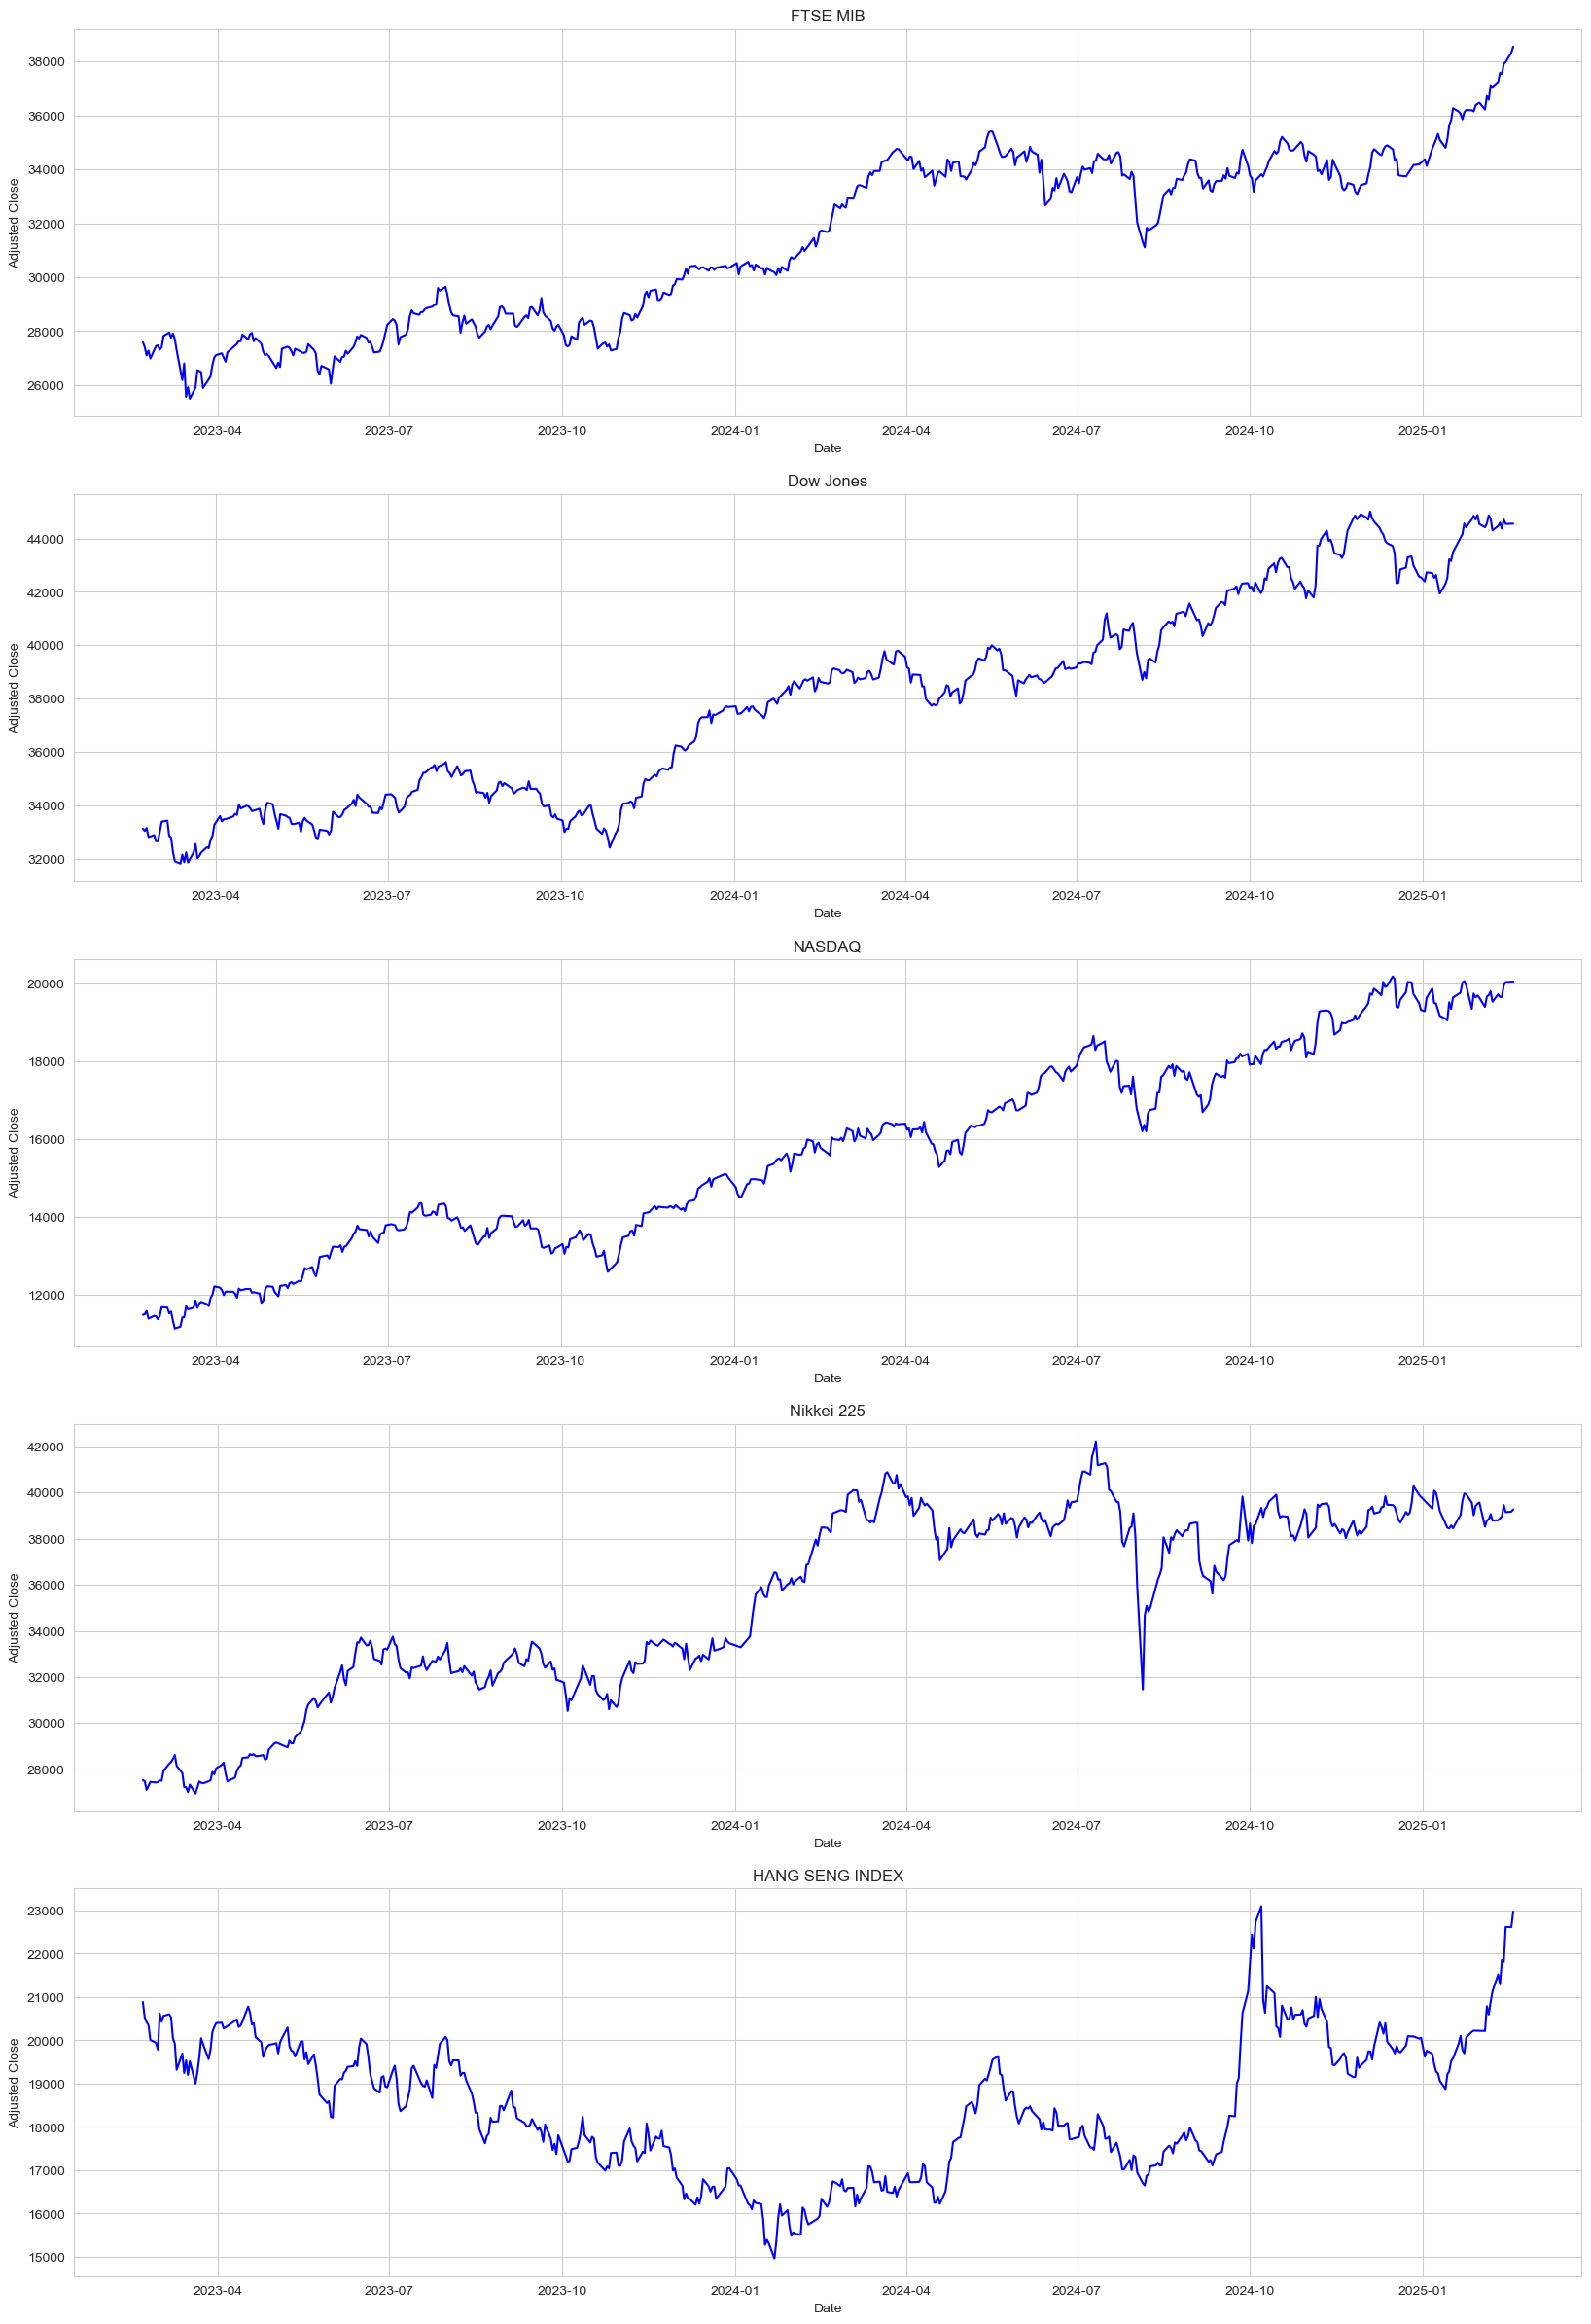

In [16]:
dfs_adj_closes = []
for index in injector.indexes:
    dfs_adj_closes.append(index.df)
multi_plot_in_row(dfs=dfs_adj_closes, plot_names=injector.get_indexes_names(), info=IndexMeta.ADJUSTED_CLOSE)

## Analisi del dataset
Si può osservare come i rendimenti logaritmici del dataset variano per i vari indici che sono osservati, si sceglie di prendere gli indici logaritmici in percentuale.

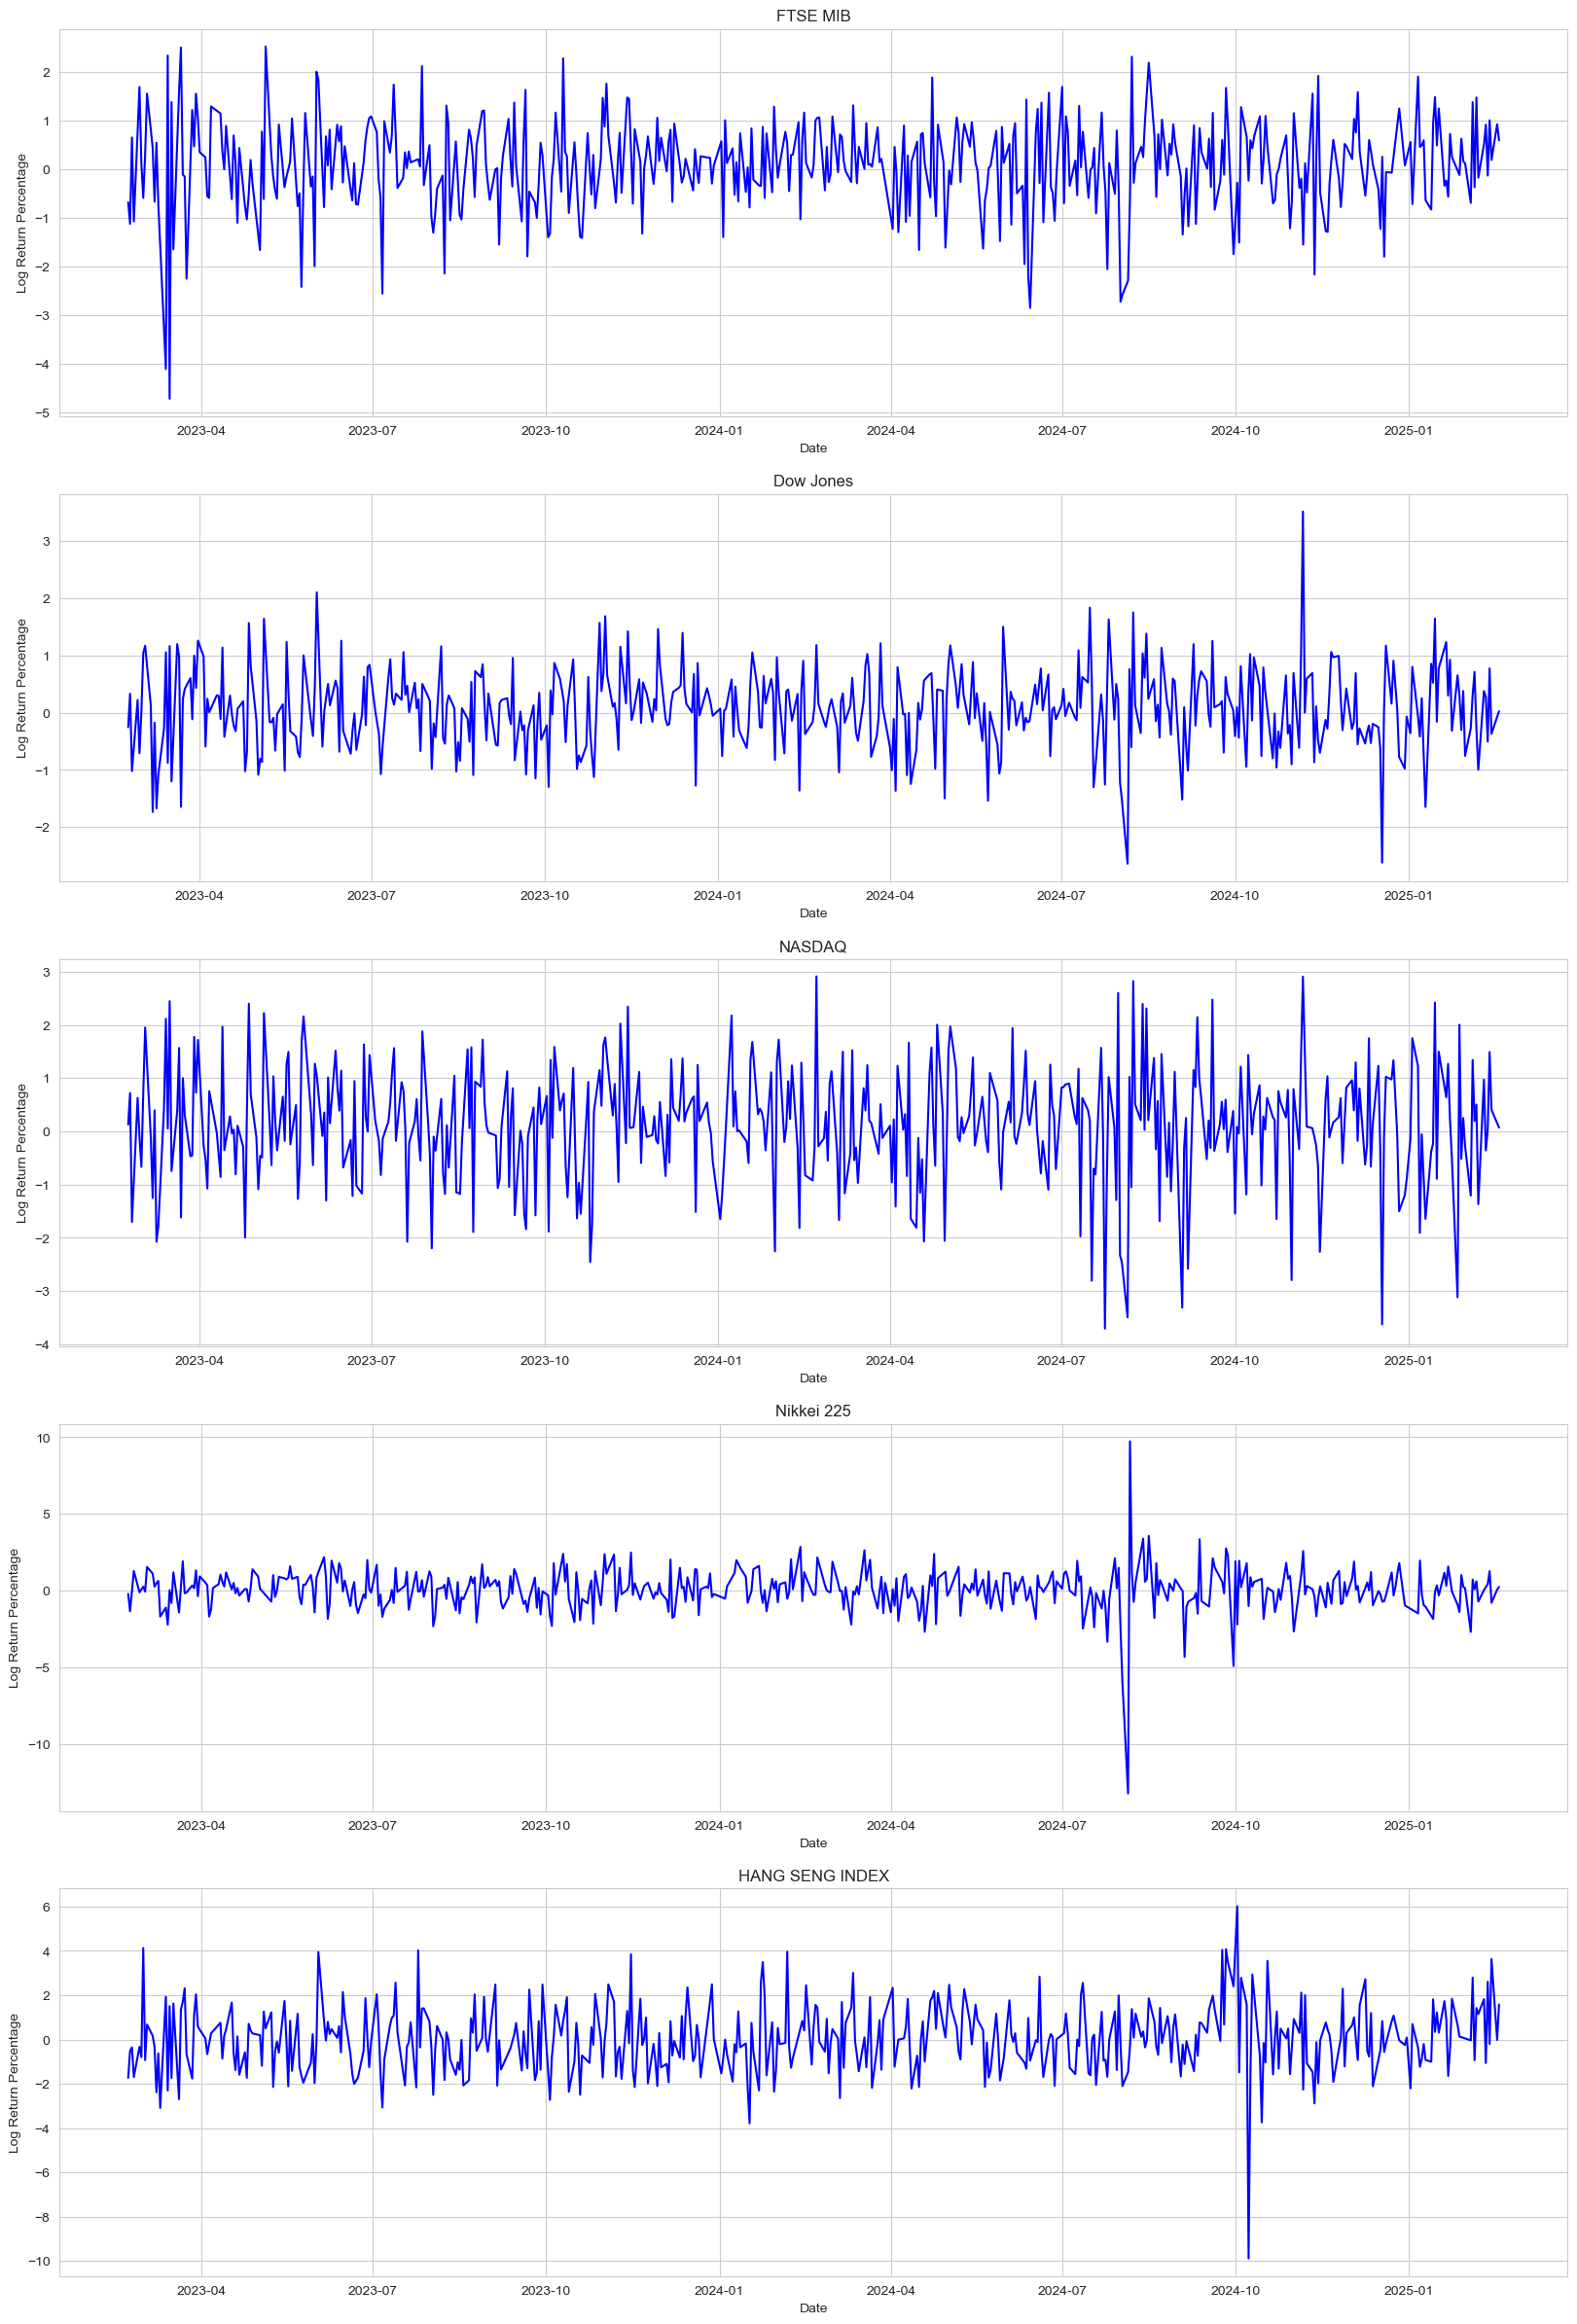

In [17]:
dfs_log_ret = []
for index in injector.indexes:
    dfs_log_ret.append(index.daily_info)
multi_plot_in_row(dfs=dfs_log_ret, plot_names=injector.get_indexes_names())

In [20]:
def multi_stem_in_row(dfs: list[pd.DataFrame], info=IndexMeta.ACF_LOG_RET,
                      fig_size=(20, 30), plot_names=None):
    if plot_names is None:
        plot_names = ["plot"]
    fig, axs = plt.subplots(len(dfs), 1, figsize=fig_size)
    i = 0
    for df in dfs:
        axs[i].stem(df.index, df[info], linefmt='b-', markerfmt='bo', basefmt='r-')
        axs[i].set_title(f'{plot_names[i%len(plot_names)]}')
        i+=1
    plt.show()

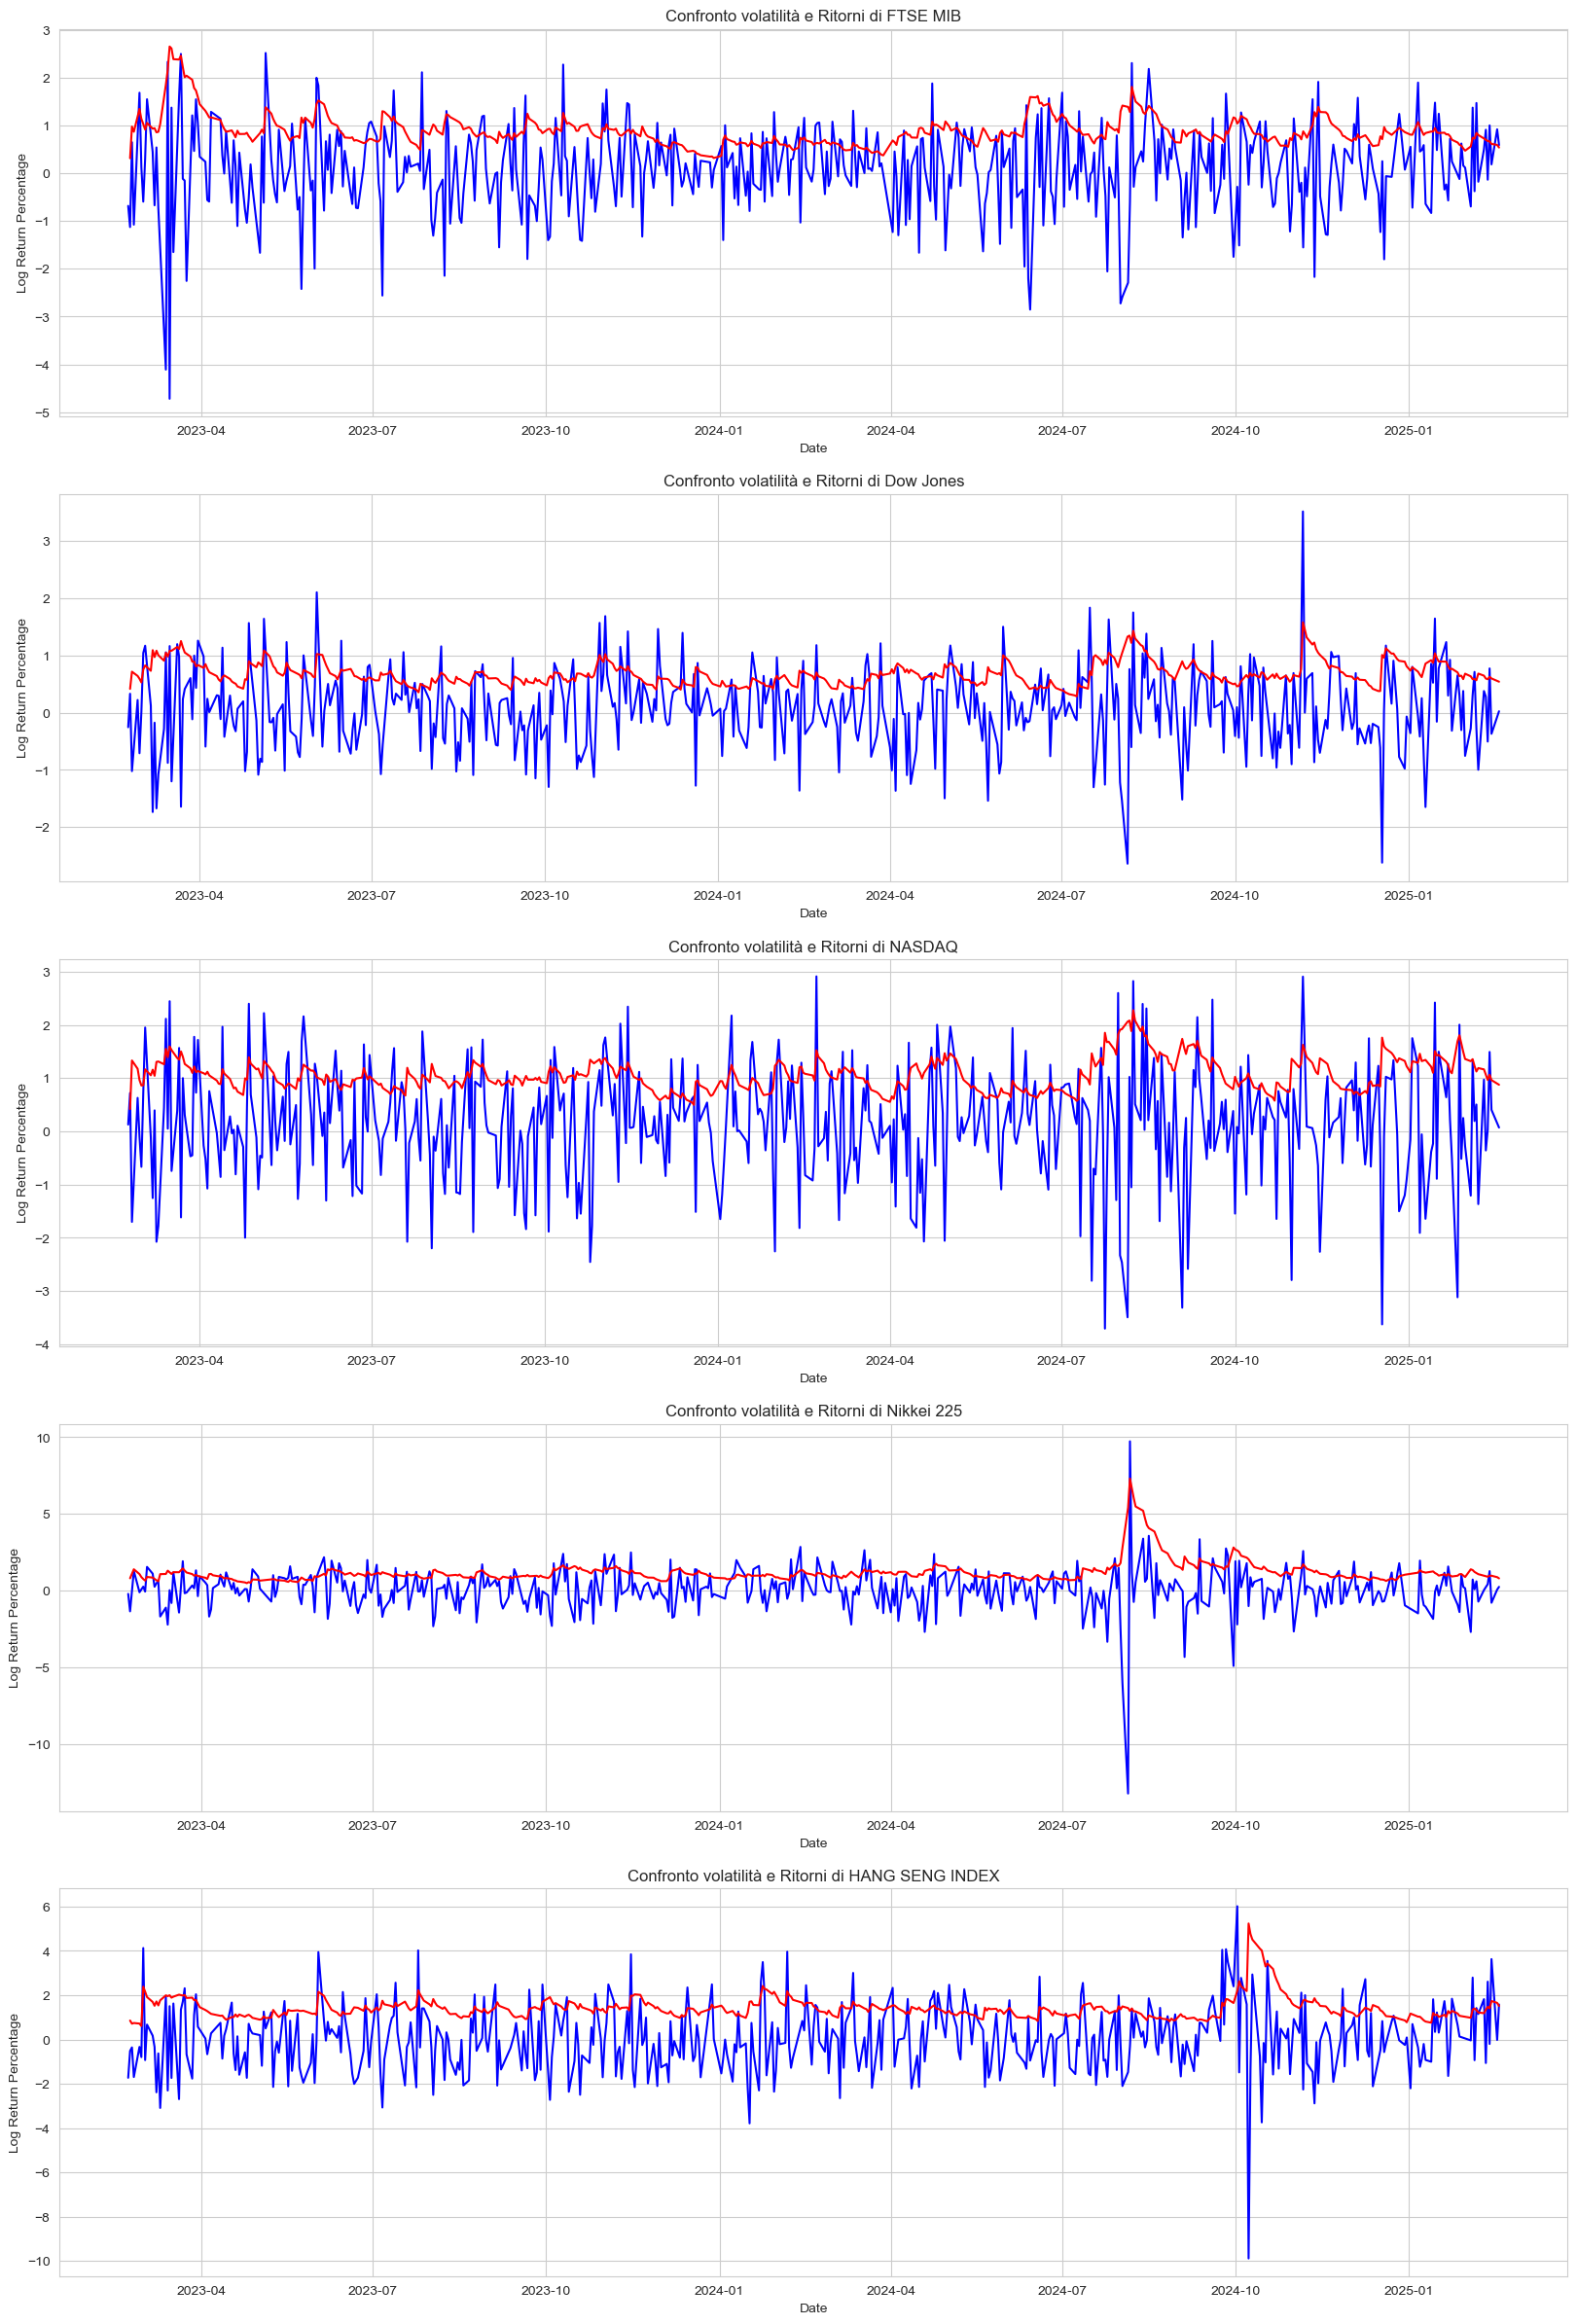

In [36]:
fig, axs = plt.subplots(len(injector.indexes), 1, figsize=(20, 30))
i = 0
for index in injector.indexes:
    sns.lineplot(x=index.daily_info.index, y=index.daily_info[IndexMeta.LOG_RETURN_PERCENTAGE], ax=axs[i], color='blue')
    sns.lineplot(x=index.volatility.index, y=index.volatility[IndexMeta.VOLATILITY_EWM], ax=axs[i], color='red')
    axs[i].set_title(f'Confronto volatilità e Ritorni di {index.i_name}')
    i+=1
plt.show()

ValueError: x and y must have same first dimension, but have shapes (506,) and (1,)

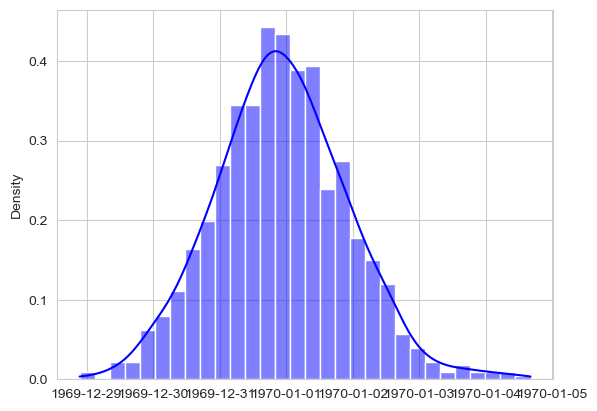

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


sns.histplot(data, kde=True, stat="density", bins=30, color="blue")

# Sovrapporre la distribuzione normale teorica
plt.plot(x, norm.pdf(x, np.mean(injector.indexes[0].df[IndexMeta.ADJUSTED_CLOSE]), np.std(injector.indexes[0].df[IndexMeta.ADJUSTED_CLOSE])), color="red", linewidth=2)
plt.show()


## Modelli GARCH
I modelli GARCH (Generalized Autoregressive Conditional Heteroskedasticity) sono una famiglia di modelli utilizzati per analizzare e prevedere la volatilità nel contesto delle serie temporali finanziarie, come i prezzi delle azioni, i tassi di cambio o i tassi di interesse. Questi modelli sono particolarmente utili quando la variabilità dei dati non è costante nel tempo, cioè quando la volatilità cambia periodicamente\
### Motivazione per l'uso dei modelli GARCH
In molte serie temporali finanziarie, la variabilità dei rendimenti non è uniforme nel tempo. Ad esempio, durante periodi di crisi economica, la volatilità tende ad aumentare, mentre durante periodi di stabilità, la volatilità può ridursi.
I modelli GARCH sono progettati per catturare questa variabilità dinamica, facendo sì che la volatilità futura dipenda sia dai valori passati della volatilità che dagli errori di previsione passati.
### Struttura del modello GARCH
Un modello GARCH è costituito da due componenti principali:

- Autoregressivo (AR): Modella la dipendenza della serie temporale dai suoi valori passati.
- Condizionale (CH): Specifica come la volatilità condizionale (varianza) dipenda dai dati passati.
Un modello GARCH(p, q) può essere espresso come segue:

$${r_t=\mu + \epsilon_t}$$
$${\epsilon_t=\sigma_te_t}$$
$${\sigma^2_t=\omega+\alpha\epsilon^2_{t-1}+\beta\sigma^2_{t-1}}$$
dove:
- ${r_t}$ è il rendimento al tempo t
- ${\mu}$ è la media della serie
- ${\epsilon}$ è l'errore al tempo t che dipende dalla volatilità condizionale ${\sigma^2_t}$\
La volatilità condizionale ${\sigma^2_t}$ è modellata come una combinazione lineare degli errori passati e dalla volatilità al passo precedente

## GARCH (1,1)
Proviamo il modello più semplice con Media costante con ${e_t \sim N(0,1)}$


In [ ]:
%%capture
from controller.garch_model import Analyzer
analyzer = Analyzer(loader=injector)
analyzer.fit()

In [ ]:
fig = analyzer.actual_results[0].plot(annualize='D')

In [ ]:
"""plt.figure(figsize=(12, 6))
df = get_df_to_show(name, injector)
plt.plot(df.index, df['Adjusted Close'])
plt.show()"""
df = injector.indexes[0].volatility
df['Volatility'] = df['Volatility'] * np.sqrt(252) 
plt.plot(df.index, df['Volatility'])
plt.show()

In [ ]:
from arch import arch_model

In [ ]:
am = arch_model(injector.indexes[0].daily_return['Log Return Percentage'], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp='off')
res.plot(annualize='D')

In [ ]:
am = arch_model(injector.indexes[0].daily_return['Log Return Percentage'], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5, disp='off')
res.plot(annualize='D')

In [ ]:
am = arch_model(injector.indexes[0].daily_return['Log Return Percentage'], p=1, o=1, q=1, dist='skewt')
res = am.fit(update_freq=5, disp='off')
res.plot(annualize='D')

In [ ]:
f_res = am.fix([0.0235, 0.01, 0.06, 0.0, 0.9382, 8.0])
f_res.plot(annualize='D')

In [ ]:
df = pd.DataFrame(res.conditional_volatility)
df

In [ ]:
injector.indexes[0].volatility

In [ ]:
con = pd.concat([df, injector.indexes[0].volatility], axis=1, join='outer').dropna()
subplot = con.plot()
subplot.set_xlim(xlim)

In [ ]:
dummy = pd.DataFrame(injector.indexes[0].daily_return['Log Return Percentage'])
dummy_ewma = np.sqrt(dummy.ewm(span=1/(1-0.90)).var())
dummy_ewma.dropna()

In [ ]:
con = pd.concat([df, dummy_ewma], axis=1, join='outer').dropna()
subplot = con.plot()
subplot.set_xlim(xlim)

In [ ]:
%%capture
!jupyter nbconvert --to html --no-input project.ipynb
